# Entrenamiento de un árbol de decisión

En esta hoja de trabajo veremos como elegir los mejores hiperparámetros para entrenar a un árbol de decisiones, así como entrenar al propio árbol y ver si los hiperparámetros elegidos dan un buen rendimiento.

Empezaremos importando las librerias y funciones que utilizaremos más adelante.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(220718)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.tree import plot_tree

# Lectura de datos y creación de los atributos y el objetivo

Vamos a empezar por importar el dataset con todos lo atributos que calculamos para la realización de este trabajo. Luego separamos el dataset en atributos por los cuales el árbol se va a entrenar, estos a su vez lo separamos en discretos y continuos para tratarlos mas adelante. Y por último elegiremos el objetivo, en este caso es un objetivo categórico.

In [2]:
# Lectura del csv para la tabla con todas las métricas
nodes = pd.read_csv("../tablas/tableWithAllAtributes.csv")
nodes.head()

,id_node,name,ml_target,degree_centrality,closeness_centrality,betweenness_centrality,clustering_coefficient,Square clustering,triangles,greedy_modularity_communities,Core number,asyn_lpa_communities
0,0,Eiryyy,0.0,0.000027,0.275005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,shawflying,0.0,0.000212,0.294956,1.149733e-06,0.178571,0.072344,0.000062,0.002227,0.151515,0.0
2,2,JpMCarrilho,1.0,0.000027,0.261845,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,SuhwanCha,0.0,0.000133,0.278718,5.316292e-05,0.000000,0.019178,0.000000,0.004454,0.090909,0.0
4,4,sunilangadi2,1.0,0.000053,0.243084,6.134318e-09,0.000000,0.000000,0.000000,0.011136,0.030303,0.0


In [3]:
# Preparación de los datos para la table con todos los atributos
atributos_discretos = ['name']
atributos_continuos = ['degree_centrality','closeness_centrality','betweenness_centrality','clustering_coefficient','Square clustering','triangles','greedy_modularity_communities','Core number','asyn_lpa_communities']
atributos = nodes.loc[:,['id_node'] + atributos_discretos + atributos_continuos]
atributos.head()

,id_node,name,degree_centrality,closeness_centrality,betweenness_centrality,clustering_coefficient,Square clustering,triangles,greedy_modularity_communities,Core number,asyn_lpa_communities
0,0,Eiryyy,0.000027,0.275005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,shawflying,0.000212,0.294956,1.149733e-06,0.178571,0.072344,0.000062,0.002227,0.151515,0.0
2,2,JpMCarrilho,0.000027,0.261845,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,SuhwanCha,0.000133,0.278718,5.316292e-05,0.000000,0.019178,0.000000,0.004454,0.090909,0.0
4,4,sunilangadi2,0.000053,0.243084,6.134318e-09,0.000000,0.000000,0.000000,0.011136,0.030303,0.0


In [4]:
# Elección del objetivo
objetivo = nodes['ml_target']
objetivo.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: ml_target, dtype: float64

# Tratamiento de los datos

Vamos a tener que discretizar la columna name, ya que el árbol con cadenas no puede trabajar. Pués con la siguente función convertimos las cadenas en número y a esos numero los vamos a nomrmalizar entre 0 y 1, de forma que cogeremos el máximo y el mínimo para ello.

In [5]:
# Codificación
codificador_atributos_discretos = OrdinalEncoder() # Crear una instancia de la clase correspondiente
codificador_atributos_discretos.fit(atributos[atributos_discretos]) # Usar el método fit para ajustar a los datos los parámetros de la codificación

# Vemos información sobre los atributos discretos
print("///Información sobre los atributos discretos///")
print('Número de atributos detectados:',
      f'{codificador_atributos_discretos.n_features_in_}')
print()
print('Nombres de los atributos detectados:')
print(f'{codificador_atributos_discretos.feature_names_in_}')
print()
print('Categorías detectadas de cada atributo:')
for atributo, categorías in zip(
    codificador_atributos_discretos.feature_names_in_,
    codificador_atributos_discretos.categories_):
    print(f'{atributo}: {categorías}')

# Ahora aplicamos el método transform para codificar los datos
atributos[atributos_discretos] = codificador_atributos_discretos.transform(
    atributos[atributos_discretos]
)


# Normalizamos el name
normalizador = MinMaxScaler(
    # Cada atributo se normaliza al intervalo [0, 1]
    feature_range=(0, 1)
)


# Aplicamos la normalización solo a la columna 'name'
atributos['name'] = normalizador.fit_transform(atributos[['name']])

print()
print("///Tabla con la columna name cambiada a números y normalizado el name///")
atributos.head()


///Información sobre los atributos discretos///
Número de atributos detectados: 1

Nombres de los atributos detectados:
['name']

Categorías detectadas de cada atributo:
name: ['007arunwilson' '007jedgar' '00Kai0' ... 'timothykimemia' 'timoxley'
 'timqian']

///Tabla con la columna name cambiada a números y normalizado el name///


,id_node,name,degree_centrality,closeness_centrality,betweenness_centrality,clustering_coefficient,Square clustering,triangles,greedy_modularity_communities,Core number,asyn_lpa_communities
0,0,0.061673,0.000027,0.275005,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1,0.929866,0.000212,0.294956,1.149733e-06,0.178571,0.072344,0.000062,0.002227,0.151515,0.0
2,2,0.106687,0.000027,0.261845,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3,0.191517,0.000133,0.278718,5.316292e-05,0.000000,0.019178,0.000000,0.004454,0.090909,0.0
4,4,0.969442,0.000053,0.243084,6.134318e-09,0.000000,0.000000,0.000000,0.011136,0.030303,0.0


# Elección de hiperparámetros

Vamos a elegir los mejores hiperparámetros para entrenar nuestro árbol de decisión, para ello vamos a utilizar la busqueda en rejilla, donde va hacer combinación entre que la máxima profundida se de 3 a 10 y que el mínimo número de ejemplos por el cual puede partinionar es 5, 10 o 15.

Como verás más adelante nos da que el árbol debería tener una profundidad de 5 nodos y que como mínimo debemos particionar con 5 ejemplos.

In [6]:
clasificador_CART = DecisionTreeClassifier()
rejilla_de_hiperparámetros = {
    # Máxima profundidad del árbol: 3, 4, 5, 6, 7, 8, 9, 10
    'max_depth': range(3, 11),
    # Mínimo número de ejemplos para poder particionar: 5, 10, 15
    'min_samples_split': range(5, 16, 5)
}

In [7]:
búsqueda_en_rejilla = GridSearchCV(clasificador_CART,
                                   rejilla_de_hiperparámetros,
                                   scoring='recall',
                                   cv=10)
búsqueda_en_rejilla.fit(atributos, objetivo)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 11),
                         'min_samples_split': range(5, 16, 5)},
             scoring='recall')

In [8]:
búsqueda_en_rejilla.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [9]:
búsqueda_en_rejilla.best_score_

0.5754264526190722

# Validación por retención

Ahora vamos a comprobar si los resultados de la busqueda en rejilla son acertados, para ello vamos a dividir el dataset en datos de entrenamiento y datos de prubebas, en este caso vamos a devidir en un 80% de los datos para entrenar y un 20% para comprobar como se ha entrenado.

Para ello vamos a entrenar varios árboles, cambiando los hiperparámetros y ver cual nos da un mejor rendimiento y luego analizaremos que significan esos rendimientos.

In [10]:
# Dividimos los conjuntos de prueba y entrenamiento
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos, objetivo,
        # Tamaño del conjunto de prueba (20 % en este caso)
        test_size=.2,
        # Estratificación según la distribución de clases en el atributo objetivo
        stratify=objetivo,
        random_state=220718)

In [11]:
# CART de 3 y 3
clasificador_CART = DecisionTreeClassifier(
    max_depth=3,  # Máxima profundidad del árbol
    min_samples_split=3  # Mínimo número de ejemplos para poder particionar
)
clasificador_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [12]:
predicciones = clasificador_CART.predict(atributos_prueba)

In [13]:
cm = confusion_matrix(predicciones, objetivo_prueba)
tabla_cm = pd.DataFrame(cm, index=["Positivo", "Negativo"], columns=["Positivo", "Negativo"])
print(tabla_cm)

          Positivo  Negativo
Positivo      5095       852
Negativo       497      1096


In [14]:
recall_score(predicciones, objetivo_prueba)

0.6880100439422473

In [15]:
# CART de 10 y 10
clasificador_CART = DecisionTreeClassifier(
    max_depth=10,  # Máxima profundidad del árbol
    min_samples_split=10  # Mínimo número de ejemplos para poder particionar
)
clasificador_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [16]:
predicciones = clasificador_CART.predict(atributos_prueba)

In [17]:
recall_score(predicciones, objetivo_prueba)

0.6765273311897106

In [18]:
cm = confusion_matrix(predicciones, objetivo_prueba)
tabla_cm = pd.DataFrame(cm, index=["Positivo", "Negativo"], columns=["Positivo", "Negativo"])
print(tabla_cm)

          Positivo  Negativo
Positivo      5089       896
Negativo       503      1052


In [19]:
# CART de 5 y 5
clasificador_CART = DecisionTreeClassifier(
    max_depth=5,  # Máxima profundidad del árbol
    min_samples_split=5  # Mínimo número de ejemplos para poder particionar
)
clasificador_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [20]:
predicciones = clasificador_CART.predict(atributos_prueba)

In [21]:
cm = confusion_matrix(predicciones, objetivo_prueba)
tabla_cm = pd.DataFrame(cm, index=["Positivo", "Negativo"], columns=["Positivo", "Negativo"])
print(tabla_cm)

          Positivo  Negativo
Positivo      5130       867
Negativo       462      1081


In [22]:
recall_score(predicciones, objetivo_prueba)

0.7005832793259883

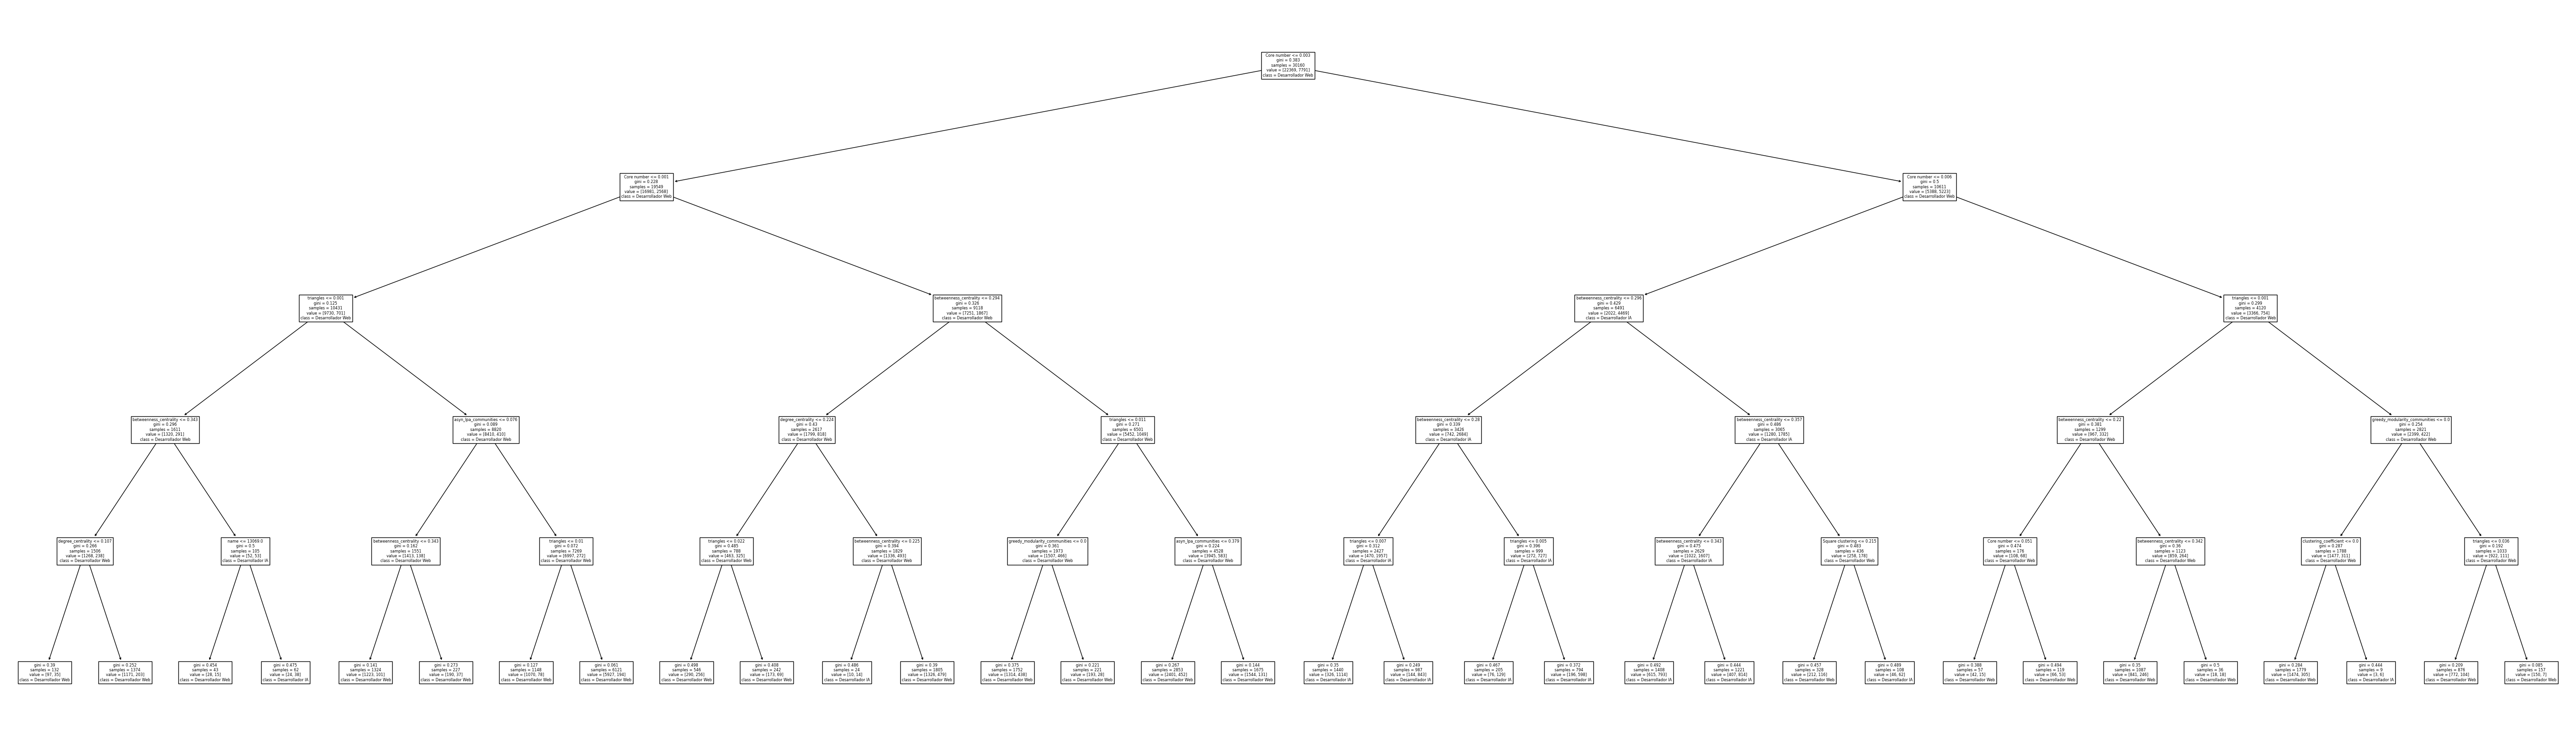

In [23]:
pyplot.figure(figsize=(70, 20))  # Anchura y altura del gráfico
árbol = plot_tree(clasificador_CART,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos + atributos_continuos,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=['Desarrollador Web', 'Desarrollador IA'])

# Análisis del resultado

Como vemos el mejor score nos lo da cuando ponemos un máximo de 5 nodos y como mínimo particionar con 5 ejemplos. Nos da una confianza del 0.7005832793259883, como en nuestros datos hay un 75% de desarrolladores web y un 25% de desarrolladores IA, sabiendo esto y mirando la matriz de confunsión vemos que el árbol está mejor entrenado que una máquina aleatoria y que son bueno resultados dado que alomejor la partición alomejor ofrece pocos ejemplos de desarrolladores IA y por eso hay bastante falsos positivos.